In [1]:
import pandas as pd 
import numpy as np
data = pd.read_excel('instagram_data.xlsx')

In [2]:
print(data)

         USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
0      georgiou82    1134619        915  18560        95   
1      georgiou82    1134619        915  17710        86   
2      georgiou82    1134619        915  11959        79   
3      georgiou82    1134619        915  13608        37   
4      georgiou82    1134619        915  15842        62   
...           ...        ...        ...    ...       ...   
19676   kourtideo      17993       7501    615         0   
19677   kourtideo      17993       7501    505         0   
19678   kourtideo      17993       7501    829         0   
19679   kourtideo      17993       7501    660         1   
19680   kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
0      Every day is a #newday and every experience is... 2017-02-11 11:05:10   
1      #goodnight !!! The #weekend is ahead!!! Have a... 2017-02-11 00:33:10   
2      #tb #2007 #stous31dromous #megat

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19681 entries, 0 to 19680
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   USERNAME               19681 non-null  object        
 1   FOLLOWERS              19681 non-null  int64         
 2   FOLLOWING              19681 non-null  int64         
 3   LIKES                  19681 non-null  int64         
 4   COMMENTS               19681 non-null  int64         
 5   TEXT                   19675 non-null  object        
 6   DATE                   19681 non-null  datetime64[ns]
 7   TYPE(1 PHOTO,2 VIDEO)  19681 non-null  int64         
 8   USERS IN PHOTO         19681 non-null  object        
 9   LINK                   19681 non-null  object        
 10  list_of_tags           13862 non-null  object        
 11  number_of_tags         19681 non-null  int64         
 12  list_of_mentions       6746 non-null   object        
 13  n

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,DATE,"TYPE(1 PHOTO,2 VIDEO)",number_of_tags,number_of_mentions
count,1.968100e+04,19681.000000,19681.000000,19681.000000,19681,19681.000000,19681.000000,19681.000000
mean,6.256413e+04,1489.766831,2497.766983,39.825111,2017-04-21 05:07:52.777196288,1.095981,6.737005,0.723591
min,1.799300e+04,0.000000,0.000000,0.000000,2016-03-27 08:21:35,1.000000,0.000000,0.000000
25%,2.329900e+04,174.000000,420.000000,1.000000,2017-04-17 21:08:39,1.000000,0.000000,0.000000
50%,3.669900e+04,506.000000,1073.000000,5.000000,2017-04-22 15:32:28,1.000000,3.000000,0.000000
75%,6.279100e+04,1367.000000,2683.000000,17.000000,2017-04-27 13:03:24,1.000000,10.000000,1.000000
max,1.134619e+06,7586.000000,158338.000000,26011.000000,2017-05-02 17:07:30,2.000000,41.000000,34.000000
std,1.042349e+05,2252.675356,5574.988136,447.972795,NaN,0.294573,8.782144,1.704316


In [4]:
# Display the count of null values in each column
null_counts = data.isnull().sum()

# Print the result
print(null_counts)

USERNAME                     0
FOLLOWERS                    0
FOLLOWING                    0
LIKES                        0
COMMENTS                     0
TEXT                         6
DATE                         0
TYPE(1 PHOTO,2 VIDEO)        0
USERS IN PHOTO               0
LINK                         0
list_of_tags              5819
number_of_tags               0
list_of_mentions         12935
number_of_mentions           0
dtype: int64


In [5]:
#Compare USER IN PHOTO to number of mentions 
print(data[['USERS IN PHOTO', 'number_of_mentions']].head(25))

   USERS IN PHOTO  number_of_mentions
0               1                   0
1               1                   0
2               3                   0
3               3                   2
4               0                   0
5               0                   0
6               0                   0
7               1                   0
8               1                   0
9               2                   1
10              3                   2
11              2                   1
12              1                   1
13              2                   1
14              2                   2
15              1                   0
16              0                   1
17              3                   0
18              0                   3
19              2                   2
20              3                   0
21              0                   0
22              1                   0
23              5                   0
24              3                   0


In [6]:
#Data manipulation for USERS in PHOTO COLUMN 
#Checks coluns and counts 
grouped_size = data.groupby('USERS IN PHOTO').size()
print(grouped_size)

#DROP THE USERS IN PHOTO COLUMN
data = data.drop('USERS IN PHOTO', axis=1)



USERS IN PHOTO
0     6629
1     2342
2      874
3      438
4      265
5      158
6       92
7       75
8       41
9       40
10      38
11      21
12      17
13      20
14      13
15      14
16       4
17       6
18      10
19      12
20      45
-     8527
dtype: int64


In [7]:
#Drop Users in Photo


In [8]:
data.isnull().sum() #shows the number of missing values in each variable
#this line of code tells us that there are no missing values, and that the only colums with missing values are the list attributes, which should be allowed to be empty
#Also text, which would represent a and empty caption
#Drop 6 empty caption post 
data = data.dropna(subset=['TEXT'])

In [9]:
#Outlier Detection
from scipy import stats


# Define the columns to check for outliers
columns_to_check = ['FOLLOWERS', 'FOLLOWING', 'LIKES', 
                    'COMMENTS', 'TYPE(1 PHOTO,2 VIDEO)',
                    'number_of_tags', 'number_of_mentions']

# Calculate Z-scores for the specified columns
z_scores = stats.zscore(data[columns_to_check])

# Create a boolean mask for rows that have all Z-scores within the threshold of ±3
mask = (abs(z_scores) < 3).all(axis=1)

# Filter the DataFrame to keep only the rows without outliers
data = data[mask]
print(data)

           USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
337    marakiiliaki     365995       1160  13198        24   
338    marakiiliaki     365995       1160   9944        21   
340    marakiiliaki     365995       1160   9980        24   
341    marakiiliaki     365995       1160  12934        39   
342    marakiiliaki     365995       1160  10308        14   
...             ...        ...        ...    ...       ...   
19676     kourtideo      17993       7501    615         0   
19677     kourtideo      17993       7501    505         0   
19678     kourtideo      17993       7501    829         0   
19679     kourtideo      17993       7501    660         1   
19680     kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
337             Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
338                                Αιγαίο...#happyeaster 2017-04-15 14:38:22   
340            

In [10]:
data['TYPE(1 PHOTO,2 VIDEO)'] = data['TYPE(1 PHOTO,2 VIDEO)'].replace({1: 0, 2: 1})
#Makes 0 = Photo, 1 = Video
data = data.rename(columns={'TYPE(1 PHOTO,2 VIDEO)': 'TYPE(0 = PHOTO)'})
print(data)

#Make the Next column a string:
data['TEXT'] = data['TEXT'].astype('string')


           USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
337    marakiiliaki     365995       1160  13198        24   
338    marakiiliaki     365995       1160   9944        21   
340    marakiiliaki     365995       1160   9980        24   
341    marakiiliaki     365995       1160  12934        39   
342    marakiiliaki     365995       1160  10308        14   
...             ...        ...        ...    ...       ...   
19676     kourtideo      17993       7501    615         0   
19677     kourtideo      17993       7501    505         0   
19678     kourtideo      17993       7501    829         0   
19679     kourtideo      17993       7501    660         1   
19680     kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
337             Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
338                                Αιγαίο...#happyeaster 2017-04-15 14:38:22   
340            

In [11]:
print(data.dtypes)



USERNAME                      object
FOLLOWERS                      int64
FOLLOWING                      int64
LIKES                          int64
COMMENTS                       int64
TEXT                  string[python]
DATE                  datetime64[ns]
TYPE(0 = PHOTO)                int64
LINK                          object
list_of_tags                  object
number_of_tags                 int64
list_of_mentions              object
number_of_mentions             int64
dtype: object


In [12]:
#Check for and Drop Duplicates 
# Step 1: Check for duplicates
duplicates = data.duplicated()
print("Duplicate Rows:")
print(data[duplicates])

# Step 2: Remove duplicates
data_cleaned = data.drop_duplicates()

print("\nData After Removing Duplicates:")
print(data_cleaned)

Duplicate Rows:
Empty DataFrame
Columns: [USERNAME, FOLLOWERS, FOLLOWING, LIKES, COMMENTS, TEXT, DATE, TYPE(0 = PHOTO), LINK, list_of_tags, number_of_tags, list_of_mentions, number_of_mentions]
Index: []

Data After Removing Duplicates:
           USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
337    marakiiliaki     365995       1160  13198        24   
338    marakiiliaki     365995       1160   9944        21   
340    marakiiliaki     365995       1160   9980        24   
341    marakiiliaki     365995       1160  12934        39   
342    marakiiliaki     365995       1160  10308        14   
...             ...        ...        ...    ...       ...   
19676     kourtideo      17993       7501    615         0   
19677     kourtideo      17993       7501    505         0   
19678     kourtideo      17993       7501    829         0   
19679     kourtideo      17993       7501    660         1   
19680     kourtideo      17993       7501    598         0   

                  

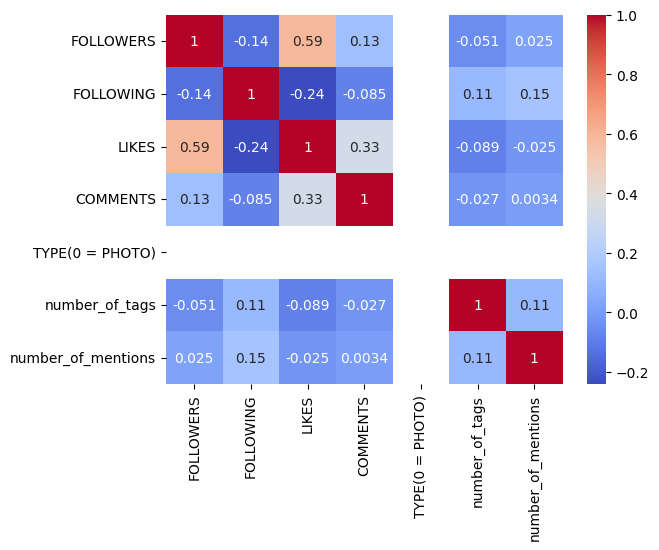

In [13]:
#Make a correltion matrix for the paper 
# Create the correlation matrix
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
#Problem  1
#additional Feature Engineering
# (1)	Number of followers - Done
# (2)	Number of following - Done 
# (3)	Month of posting 
data['MONTH']=data['DATE'].dt.month_name()

# (4)	Day of posting (Monday, Tuesday, ...)
data['DAY']=data['DATE'].dt.day_name()
# (5)	Timing of the post

# a.	Morning (between 8AM and noon)
# b.	Afternoon (noon – 4PM)
# c.	Evening (4PM-8PM) 
# d.	Night (8PM to midnight)

def classify_time_of_day(hour):
    # Validate that hour is within the 24-hour range
    if not (0 <= hour < 24):
        raise ValueError("Hour must be between 0 and 23.")
    
    if 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return None  # Drop hours between midnight and 8 AM

#Apply the function to the 'date' column and create a new column 'time_of_day'
data['time_of_day'] = data['DATE'].dt.hour.apply(classify_time_of_day)


# (6)	Number of hashtags used in the post- Done
# (7)	Number of people tagged in the post - Done 
# (8)	Type of post (video or photo) - Done 
# (9)	Number of users in the post - Done 
# (10)	Length of the post’s text

data['text_length'] = data['TEXT'].str.len()

print(data)

           USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
337    marakiiliaki     365995       1160  13198        24   
338    marakiiliaki     365995       1160   9944        21   
340    marakiiliaki     365995       1160   9980        24   
341    marakiiliaki     365995       1160  12934        39   
342    marakiiliaki     365995       1160  10308        14   
...             ...        ...        ...    ...       ...   
19676     kourtideo      17993       7501    615         0   
19677     kourtideo      17993       7501    505         0   
19678     kourtideo      17993       7501    829         0   
19679     kourtideo      17993       7501    660         1   
19680     kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
337             Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
338                                Αιγαίο...#happyeaster 2017-04-15 14:38:22   
340            

In [15]:
#Dummy Code Month. Day, and Time of day
#Drop the first in each column to avoid multicollinearity
data = pd.get_dummies(data, columns=['MONTH', 'DAY', 'time_of_day'], drop_first=True)
#Drops Month_APRIL, DAY_Friday, and time_of_day_afternoon
print(data)
print(data.columns)

           USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
337    marakiiliaki     365995       1160  13198        24   
338    marakiiliaki     365995       1160   9944        21   
340    marakiiliaki     365995       1160   9980        24   
341    marakiiliaki     365995       1160  12934        39   
342    marakiiliaki     365995       1160  10308        14   
...             ...        ...        ...    ...       ...   
19676     kourtideo      17993       7501    615         0   
19677     kourtideo      17993       7501    505         0   
19678     kourtideo      17993       7501    829         0   
19679     kourtideo      17993       7501    660         1   
19680     kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
337             Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
338                                Αιγαίο...#happyeaster 2017-04-15 14:38:22   
340            

In [16]:
#Make binary columns into 1s and 0s 
#True = 1, False = 0
columns_to_convert = ['MONTH_December', 'MONTH_February', 'MONTH_January', 'MONTH_March', 
                      'MONTH_May', 'DAY_Monday', 'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday', 
                      'DAY_Tuesday', 'DAY_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning', 
                      'time_of_day_Night']

# Convert only the specified columns to integers
data[columns_to_convert] = data[columns_to_convert].astype(int)

In [17]:
#Linear Regression - Likes
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = data[[ 'FOLLOWERS', 'FOLLOWING', 'TYPE(0 = PHOTO)', 
        'number_of_tags', 
       'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
       'MONTH_January', 'MONTH_March', 'MONTH_May', 'DAY_Monday',
       'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday', 'DAY_Tuesday',
       'DAY_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night']]

IVs = IVs.astype('int64')
DV = data['LIKES'].astype('int64')


# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs)

# Fit the OLS model using Statsmodels
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     547.7
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:37:46   Log-Likelihood:            -1.5313e+05
No. Observations:               17032   AIC:                         3.063e+05
Df Residuals:                   17012   BIC:                         3.065e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 615.7375    

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

# Define independent variables (IVs) and dependent variable (DV)
IVs = data[[
    'FOLLOWERS', 'FOLLOWING', 'TYPE(0 = PHOTO)', 'number_of_tags',
    'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
    'MONTH_January', 'MONTH_March', 'MONTH_May', 'DAY_Monday',
    'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday', 'DAY_Tuesday',
    'DAY_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
    'time_of_day_Night'
]]
DV = data['LIKES']

# Convert to numeric, replacing invalid entries with NaN
IVs = IVs.apply(pd.to_numeric, errors='coerce')
DV = pd.to_numeric(DV, errors='coerce')

# Drop rows with NaN in either IVs or DV
IVs = IVs.dropna()
DV = DV.loc[IVs.index]  # Align DV with filtered IVs

# Separate binary and continuous columns
binary_columns = ['TYPE(0 = PHOTO)', 'MONTH_December', 'MONTH_February', 'MONTH_January',
                  'MONTH_March', 'MONTH_May', 'DAY_Monday', 'DAY_Saturday', 'DAY_Sunday',
                  'DAY_Thursday', 'DAY_Tuesday', 'DAY_Wednesday', 'time_of_day_Evening',
                  'time_of_day_Morning', 'time_of_day_Night']
continuous_columns = ['FOLLOWERS', 'FOLLOWING', 'number_of_tags', 'number_of_mentions', 'text_length']

# Standardize only continuous columns
IVs_continuous = IVs[continuous_columns].apply(zscore)
IVs_binary = IVs[binary_columns]

# Combine back into a single dataframe
IVs_standardized = pd.concat([IVs_continuous, IVs_binary], axis=1)

# Standardize the dependent variable (DV)
DV_standardized = zscore(DV)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Confirm everything is numeric
print(IVs_with_const.dtypes)
print(DV_standardized.dtype)

# Check if there are NaN values
print(IVs_with_const.isna().sum())
print(DV_standardized.isna().sum())

# Optionally, remove rows with NaN values (if necessary)
IVs_with_const = IVs_with_const.dropna()
DV_standardized = DV_standardized.dropna()

# Convert again if necessary
IVs_with_const = IVs_with_const.astype(float)
DV_standardized = DV_standardized.astype(float)

# Verify the data types
# print(IVs_with_const.dtypes)
# print(DV_standardized.dtype)

# Fit the OLS model
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

const                  float64
FOLLOWERS              float64
FOLLOWING              float64
number_of_tags         float64
number_of_mentions     float64
text_length            Float64
TYPE(0 = PHOTO)          int64
MONTH_December           int32
MONTH_February           int32
MONTH_January            int32
MONTH_March              int32
MONTH_May                int32
DAY_Monday               int32
DAY_Saturday             int32
DAY_Sunday               int32
DAY_Thursday             int32
DAY_Tuesday              int32
DAY_Wednesday            int32
time_of_day_Evening      int32
time_of_day_Morning      int32
time_of_day_Night        int32
dtype: object
float64
const                  0
FOLLOWERS              0
FOLLOWING              0
number_of_tags         0
number_of_mentions     0
text_length            0
TYPE(0 = PHOTO)        0
MONTH_December         0
MONTH_February         0
MONTH_January          0
MONTH_March            0
MONTH_May              0
DAY_Monday             0
DA

In [19]:
#Linear Regression - Comments 
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = data[[ 'FOLLOWERS', 'FOLLOWING', 'TYPE(0 = PHOTO)', 
        'number_of_tags', 
       'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
       'MONTH_January', 'MONTH_March', 'MONTH_May', 'DAY_Monday',
       'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday', 'DAY_Tuesday',
       'DAY_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night']]

IVs = IVs.astype('int64')
DV = data['COMMENTS'].astype('int64')


# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs)

# Fit the OLS model using Statsmodels
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     25.96
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.68e-91
Time:                        13:37:46   Log-Likelihood:                -93605.
No. Observations:               17032   AIC:                         1.873e+05
Df Residuals:                   17012   BIC:                         1.874e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.6712    

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

# Define independent variables (IVs) and dependent variable (DV)
IVs = data[[
    'FOLLOWERS', 'FOLLOWING', 'TYPE(0 = PHOTO)', 'number_of_tags',
    'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
    'MONTH_January', 'MONTH_March', 'MONTH_May', 'DAY_Monday',
    'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday', 'DAY_Tuesday',
    'DAY_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
    'time_of_day_Night'
]]
DV = data['COMMENTS']

# Convert to numeric, replacing invalid entries with NaN
IVs = IVs.apply(pd.to_numeric, errors='coerce')
DV = pd.to_numeric(DV, errors='coerce')

# Drop rows with NaN in either IVs or DV
IVs = IVs.dropna()
DV = DV.loc[IVs.index]  # Align DV with filtered IVs

# Separate binary and continuous columns
binary_columns = ['TYPE(0 = PHOTO)', 'MONTH_December', 'MONTH_February', 'MONTH_January',
                  'MONTH_March', 'MONTH_May', 'DAY_Monday', 'DAY_Saturday', 'DAY_Sunday',
                  'DAY_Thursday', 'DAY_Tuesday', 'DAY_Wednesday', 'time_of_day_Evening',
                  'time_of_day_Morning', 'time_of_day_Night']
continuous_columns = ['FOLLOWERS', 'FOLLOWING', 'number_of_tags', 'number_of_mentions', 'text_length']

# Standardize only continuous columns
IVs_continuous = IVs[continuous_columns].apply(zscore)
IVs_binary = IVs[binary_columns]

# Combine back into a single dataframe
IVs_standardized = pd.concat([IVs_continuous, IVs_binary], axis=1)

# Standardize the dependent variable (DV)
DV_standardized = zscore(DV)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Confirm everything is numeric
print(IVs_with_const.dtypes)
print(DV_standardized.dtype)

# Check if there are NaN values
print(IVs_with_const.isna().sum())
print(DV_standardized.isna().sum())

# Optionally, remove rows with NaN values (if necessary)
IVs_with_const = IVs_with_const.dropna()
DV_standardized = DV_standardized.dropna()

# Convert again if necessary
IVs_with_const = IVs_with_const.astype(float)
DV_standardized = DV_standardized.astype(float)

# Verify the data types
# print(IVs_with_const.dtypes)
# print(DV_standardized.dtype)

# Fit the OLS model
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

const                  float64
FOLLOWERS              float64
FOLLOWING              float64
number_of_tags         float64
number_of_mentions     float64
text_length            Float64
TYPE(0 = PHOTO)          int64
MONTH_December           int32
MONTH_February           int32
MONTH_January            int32
MONTH_March              int32
MONTH_May                int32
DAY_Monday               int32
DAY_Saturday             int32
DAY_Sunday               int32
DAY_Thursday             int32
DAY_Tuesday              int32
DAY_Wednesday            int32
time_of_day_Evening      int32
time_of_day_Morning      int32
time_of_day_Night        int32
dtype: object
float64
const                  0
FOLLOWERS              0
FOLLOWING              0
number_of_tags         0
number_of_mentions     0
text_length            0
TYPE(0 = PHOTO)        0
MONTH_December         0
MONTH_February         0
MONTH_January          0
MONTH_March            0
MONTH_May              0
DAY_Monday             0
DA

In [21]:
#Question 2 
# Import required libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt
import seaborn as sns

# Check if NLTK data path includes the required lexicon
nltk.data.path.append("/Users/adityanene/nltk_data")  # Set the correct path to your nltk_data directory
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Max\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Step 3: Create new variables
#Is_English

from langdetect import detect, DetectorFactory
# Set seed for consistency in language detection
DetectorFactory.seed = 0
# Example DataFrame
# Function to detect language and create binary variable
def is_english(text):
    try:
        return 1 if detect(text) == 'en' else 0
    except:
        return 0  # Return 0 if detection fails
# Apply the function to the DataFrame
data['is_english'] = data['TEXT'].apply(is_english)

## 2. Text Sentiment Score
data['TEXT'] = data['TEXT'].fillna('').astype(str)  # Replace NaNs with empty strings and ensure the column is of type string

try:
    analyzer = SentimentIntensityAnalyzer()
    data['TEXT_SENTIMENT'] = data['TEXT'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
    print("VADER lexicon loaded successfully.")
except LookupError:
    print("VADER lexicon not found.")

## 3. Time Since Post
data['DATE'] = pd.to_datetime(data['DATE'])
data['TIME_SINCE_POST'] = (datetime.now() - data['DATE']).dt.days

print(data)

VADER lexicon loaded successfully.
           USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
337    marakiiliaki     365995       1160  13198        24   
338    marakiiliaki     365995       1160   9944        21   
340    marakiiliaki     365995       1160   9980        24   
341    marakiiliaki     365995       1160  12934        39   
342    marakiiliaki     365995       1160  10308        14   
...             ...        ...        ...    ...       ...   
19676     kourtideo      17993       7501    615         0   
19677     kourtideo      17993       7501    505         0   
19678     kourtideo      17993       7501    829         0   
19679     kourtideo      17993       7501    660         1   
19680     kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
337             Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
338                                Αιγαίο...#happyeaster 201

In [24]:
#Check for multicollinearity 
correlation_matrix = data[[ 'FOLLOWERS','FOLLOWING',  'TYPE(0 = PHOTO)', 
        'number_of_tags', 'is_english', 'TEXT_SENTIMENT', 'TIME_SINCE_POST',
       'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
       'MONTH_January', 'MONTH_March', 'MONTH_May', 'DAY_Monday',
       'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday', 'DAY_Tuesday',
       'DAY_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night']].corr()
print(correlation_matrix)
#Shows high collinearity with FOLLOWING, so FOLLOWING is removed

                     FOLLOWERS  FOLLOWING  TYPE(0 = PHOTO)  number_of_tags  \
FOLLOWERS             1.000000  -0.137259              NaN       -0.051241   
FOLLOWING            -0.137259   1.000000              NaN        0.108984   
TYPE(0 = PHOTO)            NaN        NaN              NaN             NaN   
number_of_tags       -0.051241   0.108984              NaN        1.000000   
is_english           -0.034193   0.158151              NaN        0.413874   
TEXT_SENTIMENT       -0.022721   0.000948              NaN        0.135410   
TIME_SINCE_POST      -0.020140   0.002246              NaN       -0.005504   
number_of_mentions    0.024851   0.153205              NaN        0.105861   
text_length          -0.017799   0.068726              NaN        0.618073   
MONTH_December       -0.007290  -0.005817              NaN        0.000936   
MONTH_February       -0.007784   0.006139              NaN       -0.014872   
MONTH_January        -0.005120  -0.007433              NaN      

In [25]:
# Step 4: Prepare independent and dependent variables for regression for likes 
## Independent variables
# Define the dependent variable (DV) and independent variables (IVs)
IVs = data[[ 'FOLLOWERS', 'FOLLOWING', 'TYPE(0 = PHOTO)', 
        'number_of_tags', 'is_english', 'TEXT_SENTIMENT', 'TIME_SINCE_POST',
       'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
       'MONTH_January', 'MONTH_March', 'MONTH_May', 'DAY_Monday',
       'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday', 'DAY_Tuesday',
       'DAY_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night']]

IVs = IVs.astype('int64')
DV = data['LIKES'].astype('int64')


# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs)

# Fit the OLS model using Statsmodels
model_likes = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model_likes.summary())


                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     502.0
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:41:54   Log-Likelihood:            -1.5309e+05
No. Observations:               17032   AIC:                         3.062e+05
Df Residuals:                   17010   BIC:                         3.064e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5289.8105   2

In [26]:
# Step 4: Prepare independent and dependent variables for regression for likes 
## Independent variables
# Define the dependent variable (DV) and independent variables (IVs)
IVs = data[[ 'FOLLOWERS',  'TYPE(0 = PHOTO)', 
        'number_of_tags', 'is_english', 'TEXT_SENTIMENT', 'TIME_SINCE_POST',
       'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
       'MONTH_January', 'MONTH_March', 'MONTH_May', 'DAY_Monday',
       'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday', 'DAY_Tuesday',
       'DAY_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night']]

IVs = IVs.astype('int64')
DV = data['COMMENTS'].astype('int64')


# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs)

# Fit the OLS model using Statsmodels
model_comments = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model_comments.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     25.60
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.87e-94
Time:                        13:41:55   Log-Likelihood:                -93596.
No. Observations:               17032   AIC:                         1.872e+05
Df Residuals:                   17011   BIC:                         1.874e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  73.0319    

In [27]:
# Step 7: Analyze Adjusted R-squared values
print("Adjusted R-squared for Likes Model:", model_likes.rsquared_adj)
print("Adjusted R-squared for Comments Model:", model_comments.rsquared_adj)

Adjusted R-squared for Likes Model: 0.3818398241268969
Adjusted R-squared for Comments Model: 0.028082737019873405


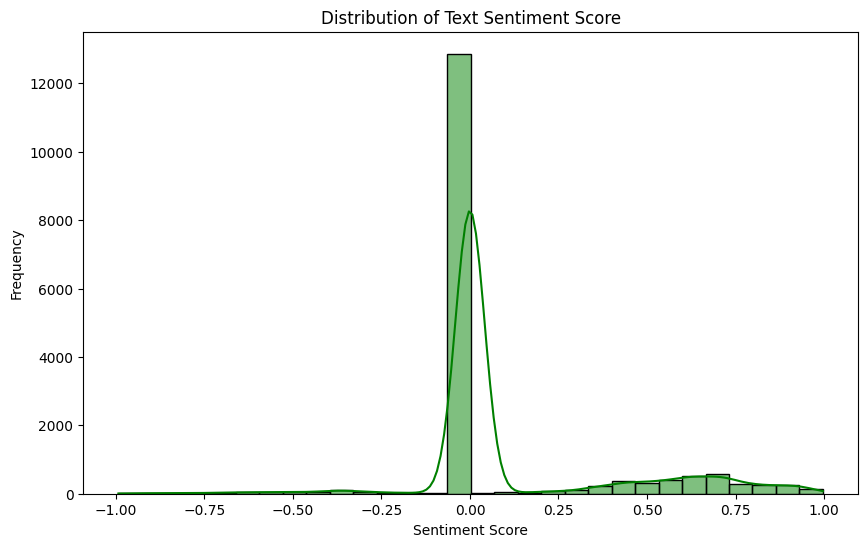

In [28]:
# 2. Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['TEXT_SENTIMENT'], bins=30, kde=True, color='green')
plt.title('Distribution of Text Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

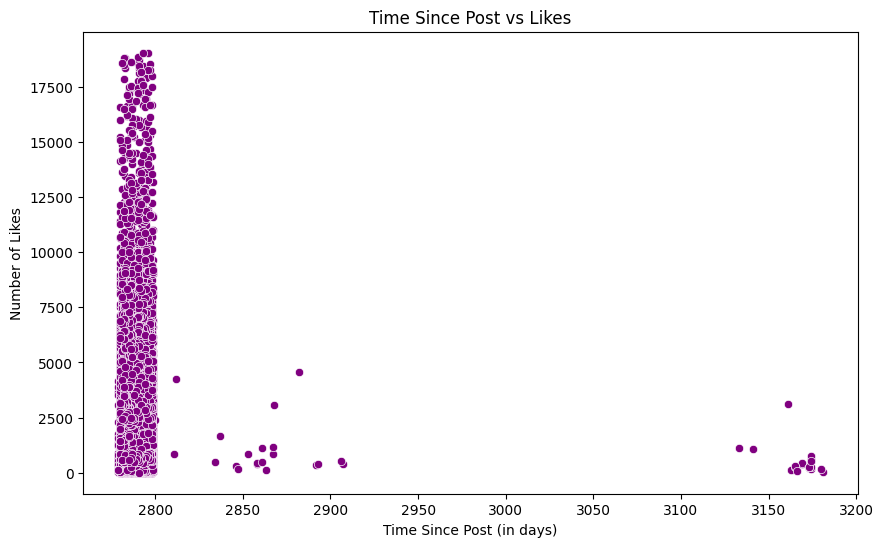

In [29]:
# 3. Time Since Post vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TIME_SINCE_POST'], y=data['LIKES'], color='purple')
plt.title('Time Since Post vs Likes')
plt.xlabel('Time Since Post (in days)')
plt.ylabel('Number of Likes')
plt.show()


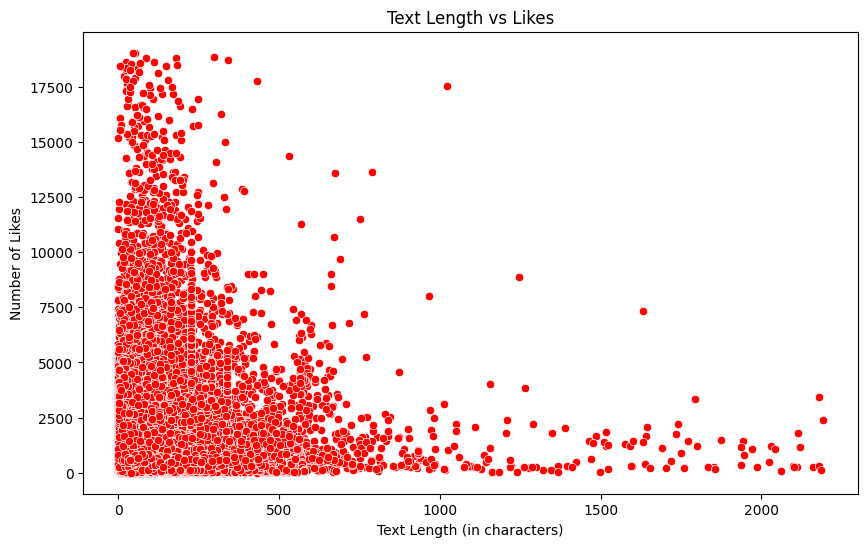

In [30]:

# 4. Text Length vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['text_length'], y=data['LIKES'], color='red')
plt.title('Text Length vs Likes')
plt.xlabel('Text Length (in characters)')
plt.ylabel('Number of Likes')
plt.show()



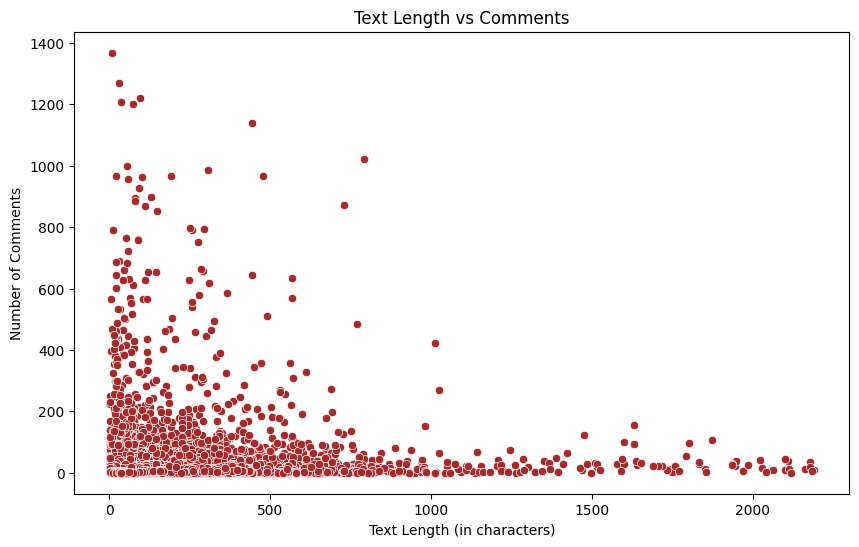

In [31]:
# 5. Text Length vs Comments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['text_length'], y=data['COMMENTS'], color='brown')
plt.title('Text Length vs Comments')
plt.xlabel('Text Length (in characters)')
plt.ylabel('Number of Comments')
plt.show()

In [32]:
#Question 3
print(data)


           USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
337    marakiiliaki     365995       1160  13198        24   
338    marakiiliaki     365995       1160   9944        21   
340    marakiiliaki     365995       1160   9980        24   
341    marakiiliaki     365995       1160  12934        39   
342    marakiiliaki     365995       1160  10308        14   
...             ...        ...        ...    ...       ...   
19676     kourtideo      17993       7501    615         0   
19677     kourtideo      17993       7501    505         0   
19678     kourtideo      17993       7501    829         0   
19679     kourtideo      17993       7501    660         1   
19680     kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
337             Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
338                                Αιγαίο...#happyeaster 2017-04-15 14:38:22   
340            

In [33]:

data['Is_weekend'] = (data['DAY_Saturday'] == 1) | (data['DAY_Sunday'] == 1)
data['Is_weekend'] = data['Is_weekend'].astype(int)
print(data)



           USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
337    marakiiliaki     365995       1160  13198        24   
338    marakiiliaki     365995       1160   9944        21   
340    marakiiliaki     365995       1160   9980        24   
341    marakiiliaki     365995       1160  12934        39   
342    marakiiliaki     365995       1160  10308        14   
...             ...        ...        ...    ...       ...   
19676     kourtideo      17993       7501    615         0   
19677     kourtideo      17993       7501    505         0   
19678     kourtideo      17993       7501    829         0   
19679     kourtideo      17993       7501    660         1   
19680     kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
337             Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
338                                Αιγαίο...#happyeaster 2017-04-15 14:38:22   
340            

In [34]:
#Linear Regression - Likes
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = data[[ 'FOLLOWERS', 'FOLLOWING', 'TYPE(0 = PHOTO)', 
        'number_of_tags', 
       'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
       'MONTH_January', 'MONTH_March', 'MONTH_May', 'Is_weekend', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night']]

IVs = IVs.astype('int64')
DV = data['LIKES'].astype('int64')


# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs)

# Fit the OLS model using Statsmodels
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     742.8
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:41:57   Log-Likelihood:            -1.5314e+05
No. Observations:               17032   AIC:                         3.063e+05
Df Residuals:                   17017   BIC:                         3.064e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 686.3395    

In [35]:
#Linear Regression - Comments
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = data[[ 'FOLLOWERS', 'FOLLOWING', 'TYPE(0 = PHOTO)', 
        'number_of_tags', 
       'number_of_mentions', 'text_length', 'MONTH_December', 'MONTH_February',
       'MONTH_January', 'MONTH_March', 'MONTH_May', 'Is_weekend', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night']]

IVs = IVs.astype('int64')
DV = data['COMMENTS'].astype('int64')


# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs)

# Fit the OLS model using Statsmodels
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     34.84
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           9.31e-94
Time:                        13:41:58   Log-Likelihood:                -93608.
No. Observations:               17032   AIC:                         1.872e+05
Df Residuals:                   17017   BIC:                         1.874e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.5431    

In [57]:
#Q4
# Split into micro (followers < 50,000) and macro (followers >= 50,000)
micro_df = data[data['FOLLOWERS'] < 50000]
macro_df = data[data['FOLLOWERS'] >= 50000]
micro_df = pd.DataFrame(micro_df)
macro_df = pd.DataFrame(macro_df)

print(micro_df)
print(macro_df)

                   USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
6546   nondas_emmanouilakis      49971        524   3780        12   
6547   nondas_emmanouilakis      49971        524     46         0   
6548             gogomastro      49827        347   1305        28   
6549             gogomastro      49827        347    925         7   
6550           quetalviajar      49796       7368   1226        19   
...                     ...        ...        ...    ...       ...   
19676             kourtideo      17993       7501    615         0   
19677             kourtideo      17993       7501    505         0   
19678             kourtideo      17993       7501    829         0   
19679             kourtideo      17993       7501    660         1   
19680             kourtideo      17993       7501    598         0   

                                                    TEXT                DATE  \
6546   Last week I was traveling for business to Thes... 2017-04-20 11:50:44   

In [54]:
# For micro influencers - Likes regression - Only includes is_english as this was the only significant variable for likes and comments 
from sklearn.metrics import mean_squared_error, r2_score
ind_cols = ['FOLLOWING', 'MONTH_December', 'MONTH_February', 'MONTH_January',
                          'MONTH_March', 'MONTH_May', 'DAY_Monday', 'DAY_Saturday', 'DAY_Sunday',
                          'DAY_Thursday', 'DAY_Tuesday', 'DAY_Wednesday',
                          'time_of_day_Morning', 'time_of_day_Evening', 'time_of_day_Night',
                          'number_of_tags', 'number_of_mentions', 'TYPE(0 = PHOTO)', 'text_length',
                          'is_english','Is_weekend']


#Make the model able to take in floats
micro_df = micro_df.astype({col: 'float64' for col in ind_cols})
macro_df = macro_df.astype({col: 'float64' for col in ind_cols})

# For micro influencers - Likes regression
X_micro_likes = micro_df[ind_cols]
y_micro_likes = micro_df['LIKES']

# For macro influencers - Likes regression
X_macro_likes = macro_df[ind_cols]
y_macro_likes = macro_df['LIKES']

# For micro influencers - Comments regression
X_micro_comments = micro_df[ind_cols]
y_micro_comments = micro_df['COMMENTS']

# For macro influencers - Comments regression
X_macro_comments = macro_df[ind_cols]
y_macro_comments = macro_df['COMMENTS']


# Step 5: Add constant to the model
X_micro_likes = sm.add_constant(X_micro_likes)
X_macro_likes = sm.add_constant(X_macro_likes)
X_micro_comments = sm.add_constant(X_micro_comments)
X_macro_comments = sm.add_constant(X_macro_comments)




In [56]:
# Function to fit and evaluate a model
def build_and_evaluate_model(X, y, model_name):
    # Fit the model
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    
    # Print results
    print(f"Model: {model_name}")
    print(model.summary())
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print("\n" + "="*50 + "\n")

# Build and evaluate all four models
build_and_evaluate_model(X_micro_likes, y_micro_likes, "Micro Influencers - Likes Regression")
build_and_evaluate_model(X_macro_likes, y_macro_likes, "Macro Influencers - Likes Regression")
build_and_evaluate_model(X_micro_comments, y_micro_comments, "Micro Influencers - Comments Regression")
build_and_evaluate_model(X_macro_comments, y_macro_comments, "Macro Influencers - Comments Regression")

Model: Micro Influencers - Likes Regression
                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     39.88
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.56e-143
Time:                        13:58:34   Log-Likelihood:            -1.0140e+05
No. Observations:               11701   AIC:                         2.028e+05
Df Residuals:                   11681   BIC:                         2.030e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------